In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/Video Games Sales.csv')

In [3]:
data.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


In [5]:
data.isnull().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

In [7]:
data["Year"].fillna( "NA",inplace=True)

In [8]:
data["Publisher"].fillna( "Unknown",inplace=True)

In [9]:
data.columns

Index(['index', 'Rank', 'Game Title', 'Platform', 'Year', 'Genre', 'Publisher',
       'North America', 'Europe', 'Japan', 'Rest of World', 'Global',
       'Review'],
      dtype='object')

### CORRELATION **ANALYSIS**

In [32]:
data.corr()

<ipython-input-32-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,index,Rank,North America,Europe,Japan,Rest of World,Global,Review
index,1.000000,1.000000,-0.480582,-0.466451,-0.358849,-0.436750,-0.529373,-0.292892
Rank,1.000000,1.000000,-0.480582,-0.466451,-0.358849,-0.436750,-0.529373,-0.292892
North America,-0.480582,-0.480582,1.000000,0.720766,0.416743,0.693662,0.933073,0.175684
Europe,-0.466451,-0.466451,0.720766,1.000000,0.402289,0.922623,0.888902,0.129741
Japan,-0.358849,-0.358849,0.416743,0.402289,1.000000,0.308785,0.591751,0.148584
Rest of World,-0.436750,-0.436750,0.693662,0.922623,0.308785,1.000000,0.837469,0.138467
Global,-0.529373,-0.529373,0.933073,0.888902,0.591751,0.837469,1.000000,0.181881
Review,-0.292892,-0.292892,0.175684,0.129741,0.148584,0.138467,0.181881,1.000000


**STATISTICAL ANALYSIS**

In [30]:
stastistics = data.describe()
stastistics

,index,Rank,North America,Europe,Japan,Rest of World,Global,Review
count,1907.0000,1907.0000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000
mean,953.0000,954.0000,1.258789,0.706675,0.317493,0.206471,2.489240,79.038977
std,550.6478,550.6478,1.956560,1.148904,0.724945,0.343093,3.563159,10.616899
min,0.0000,1.0000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,476.5000,477.5000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,953.0000,954.0000,0.810000,0.440000,0.020000,0.130000,1.530000,81.000000
75%,1429.5000,1430.5000,1.375000,0.810000,0.300000,0.220000,2.540000,86.230000
max,1906.0000,1907.0000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


In [10]:
sorted = data.sort_values(by='Global', ascending=False)
Global_Successful_Games = sorted[['Game Title', 'Global']].head(5)
print(Global_Successful_Games)

          Game Title  Global
0         Wii Sports   81.12
1  Super Mario Bros.   40.24
2     Mario Kart Wii   33.55
3  Wii Sports Resort   31.52
4             Tetris   30.26


### Top Five Successful Video **Games**

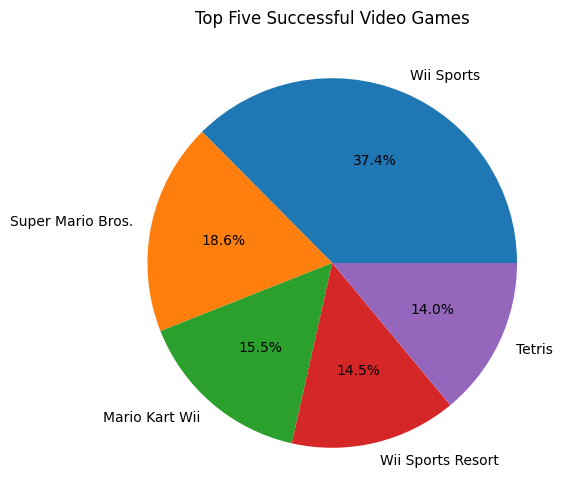

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.pie(Global_Successful_Games['Global'], labels=Global_Successful_Games['Game Title'], autopct='%1.1f%%')
plt.title('Top Five Successful Video Games')
plt.show()

### Global Sales Distribution by **Genre**

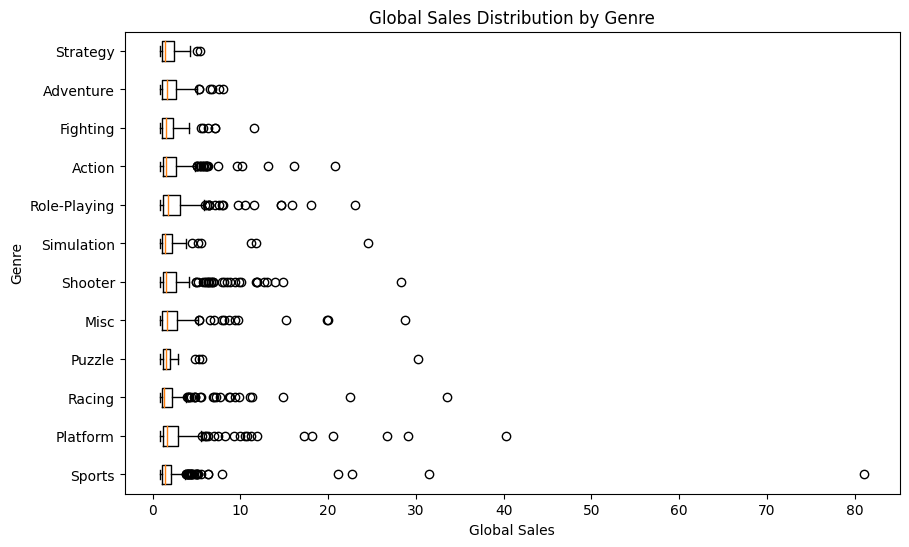

In [23]:
plt.figure(figsize=(10, 6))
plt.boxplot([data[data['Genre'] == genre]['Global'] for genre in data['Genre'].unique()], labels=data['Genre'].unique(), vert=False)
plt.xlabel('Global Sales')
plt.ylabel('Genre')
plt.title('Global Sales Distribution by Genre')
plt.show()

## **TOP 10 GENRES**

In [24]:
genre_sales = data.groupby('Genre')['Global'].sum().reset_index()
genre_sales = genre_sales.sort_values(by='Global', ascending=False)
top_10_genres = genre_sales.head(10)

print(top_10_genres)

           Genre  Global
10        Sports  703.11
0         Action  637.27
4       Platform  595.24
8        Shooter  557.20
7   Role-Playing  496.20
6         Racing  451.80
3           Misc  426.12
2       Fighting  249.00
1      Adventure  239.45
9     Simulation  205.14


## Region that played the most **games**

In [25]:
total_games_played = data[['North America', 'Europe', 'Japan', 'Rest of World']].sum()
most_games_region = total_games_played.idxmax()
print(f"The region that played the most games is: {most_games_region}")

The region that played the most games is: North America


# The Least Interested Game and Least Interested Genre

In [28]:
least_interested_game = data[data['Global'] == data['Global'].min()]['Game Title'].values[0]
least_interested_genre = data[data['Global'] == data['Global'].min()]['Genre'].values[0]

print(f"The least interestSed game is '{least_interested_game}' in the genre '{least_interested_genre}' with {data['Global'].min()} Global sales.")

The least interested game is 'DiRT' in the genre 'Racing' with 0.83 Global sales.
